# Binary Search Tree

## 什麼是BST？

### `二元搜尋樹：置放大量數字並且進行排序的資料結構，屬於一種階層架構的非線性資料結構。`  
* 原理：Divide and Conquer ，樹根居中，左子樹為較小或相等的值，右子樹為較大的值，遞迴分割下去。  
* 別名：有序二元樹（ordered binary tree）、排序二元樹（sorted binary tree）
* 最小節點：由樹根開始往左走，走到底即為最小。
* 最大節點：由樹根開始望右走，走到底極為最大。
* 規則：任何root與其左右子樹有`Key(Left)<Key(root)<Key(Right)`的關係(若pointer指向NULL則忽略)，則稱這棵樹為Binary Search Tree(BST)。
* 結構：每一個「節點」（Nodes）最多只能擁有2個子節點，即分支度小於或等於2。
* 性質：
  1. 若任意節點的左子樹不空，則左子樹上所有節點的值均小於它的根節點的值；
  2. 若任意節點的右子樹不空，則右子樹上所有節點的值均大於它的根節點的值；
  3. 任意節點的左、右子樹也分別為二元搜尋樹；
  4. 沒有鍵值相等的節點。
* 其他：最壞效率是O(n)，但它支援動態查詢，且有很多改進版的二元搜尋樹可以使樹高為O(log n)，從而將最壞效率降至O(log n)，如AVL樹、紅黑樹等。

### 時間複雜度比較：
1. 空間：平均O(n)、最差O(n)
2. 搜尋：平均O(log n)、最差O(n)
3. 插入：平均O(log n)、最差O(n)
4. 刪除：平均O(log n)、最差O(n)

http://www.csie.ntnu.edu.tw/~u91029/Order.html  
http://alrightchiu.github.io/SecondRound/binary-search-tree-introjian-jie.html
https://zh.wikipedia.org/wiki/%E4%BA%8C%E5%85%83%E6%90%9C%E5%B0%8B%E6%A8%B9

# 流程圖（共兩張）

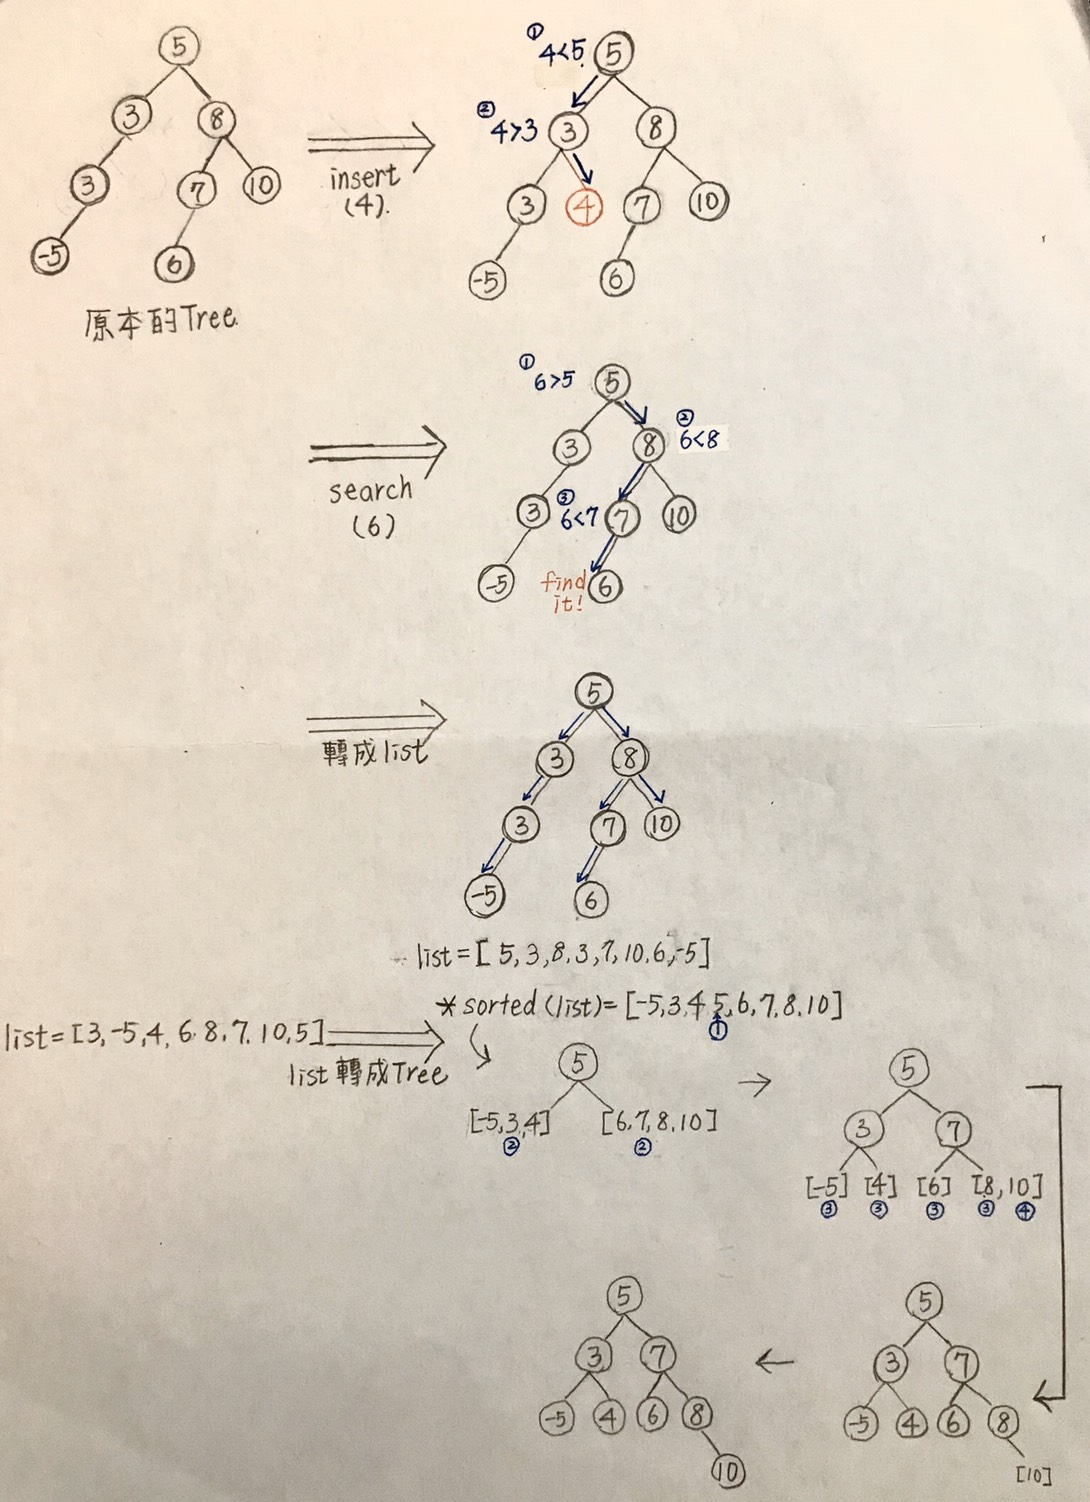

In [22]:
from IPython.display import Image
Image(filename="BST流程圖1.jpg")

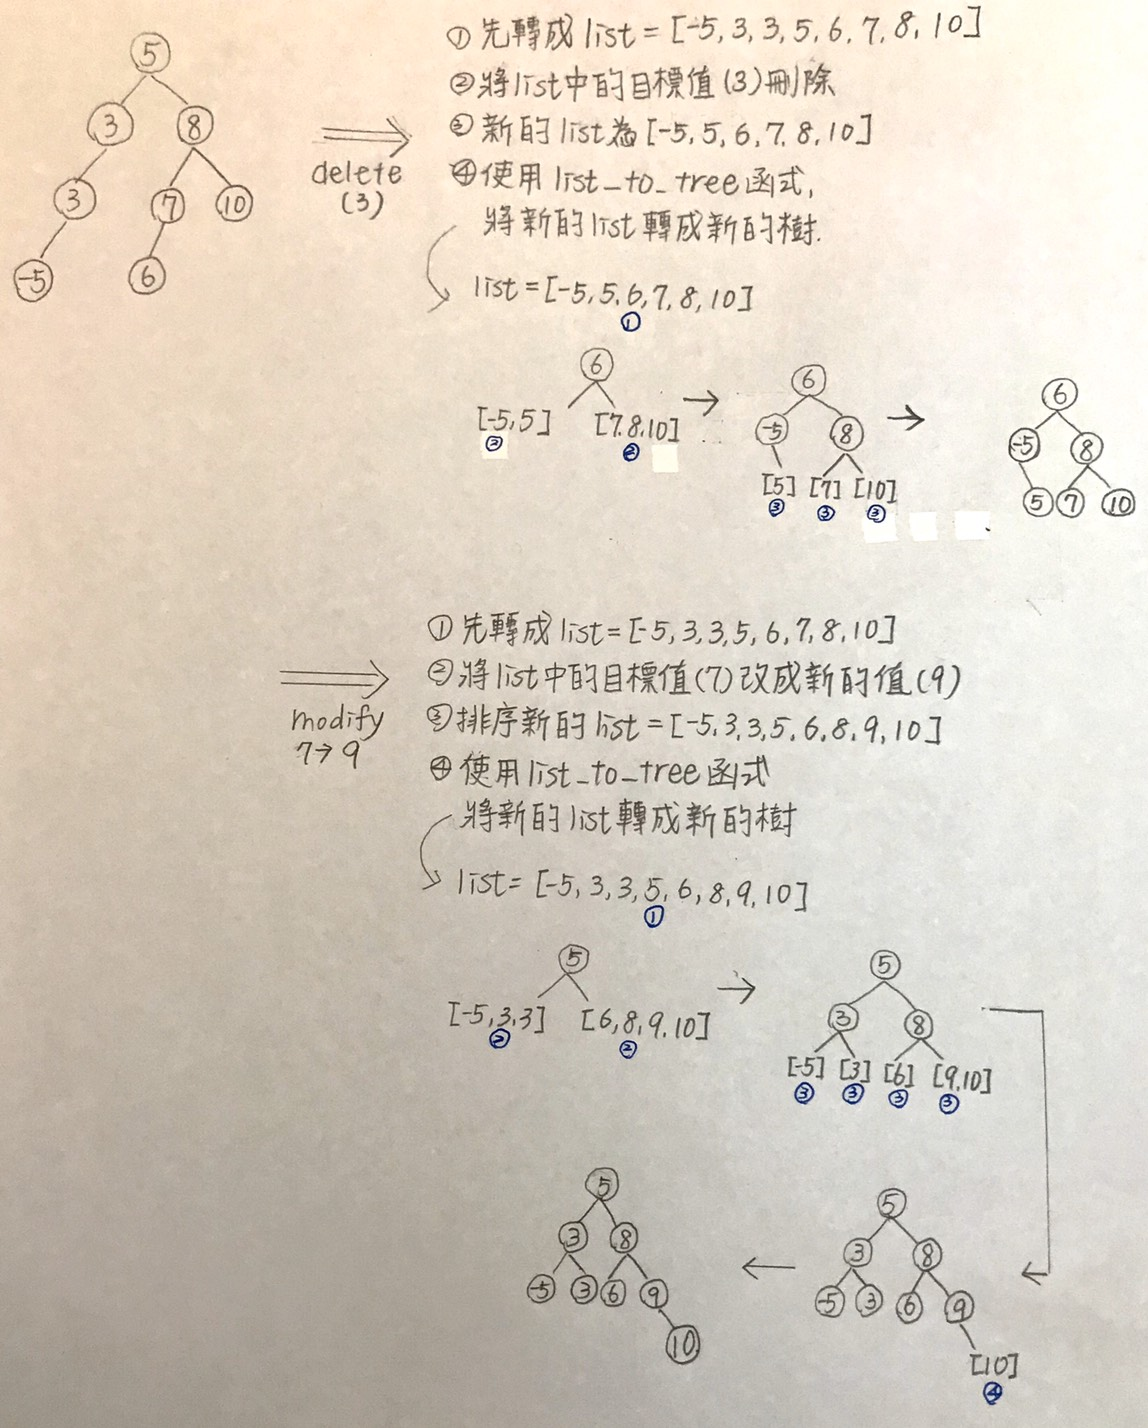

In [23]:
from IPython.display import Image
Image(filename="BST流程圖2.jpg")

## 開始試試看撰寫程式碼～

其實在修讀「資料結構與演算法」這門課之前，我對於樹的結構並不是那麼熟悉，甚至完全沒有運用過樹的程式邏輯來撰寫，所以其實這次比起以前的作業對我來說難度真的高上許多。
為了使自己更好理解樹的insert、delete、search與modify，我想說先試試看能不能將Tree的結構轉換為自己較熟悉的List，也許會比較知道該如何下手。  
首先，先按照助教的方法給予Treenode的結構，以便後面檢測自己是不是真的轉換成功：

In [1]:
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None

In [2]:
root = TreeNode(5)
Node1 = TreeNode(3)
Node2 = TreeNode(3)
Node3 = TreeNode(-5)
Node4 = TreeNode(8)
Node5 = TreeNode(7)
Node6 = TreeNode(6)
Node7=TreeNode(10)
root.left=Node1
root.left.left=Node2
root.left.left.left=Node3
root.right=Node4
root.right.left=Node5
root.right.left.left=Node6
root.right.right=Node7

In [3]:
type(root)

__main__.TreeNode

## Tree轉換為List

我的想法是：先創建一個空的list，再利用while迴圈去巡迴每個樹中的node，並將該node append進入原先設立的空list中。

In [24]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution1(object):
    def TreeToList(self, root: TreeNode): #tree轉換為list       
        
        tree_to_list=[]
        
        tree_to_list.append(root.val)
        
        current = root.left
        while current is not None:
            num = current.val
            tree_to_list.append(num)
            current = current.left   
            
        current = root.right
        while current is not None:
            num = current.val
            tree_to_list.append(num)
            current = current.right

        return tree_to_list

In [25]:
ans_to_list = Solution1().TreeToList(root)
ans_to_list

[5, 3, 3, -5, 8, 10]

回頭檢查前面創建的node，發現並非所有node都被append到list中，  
可能是迴圈邏輯有出錯，再回去檢查看看：
好的，發現一個神奇的規律，  
list中沒有被append到的點都是原本檢查左邊子樹的，若該節點同時有右邊子樹則不會被檢查到；  
同樣的，若原本檢查右邊子樹的，若該節點同時有左邊子樹也不會被檢查到。所以我們來改改看while迴圈的邏輯～

In [26]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution1(object):
    def TreeToList(self, root): #tree轉換為list       
        
        tree_to_list=[]
        
        tree_to_list.append(root.val)
        
        current = root.left
        while current is not None:
            num = current.val
            tree_to_list.append(num)
            current2 = current.right
            current = current.left
            if current2 is not None:
                num2 = current2.val
                tree_to_list.append(num2)
            
        current = root.right
        while current is not None:
            num = current.val
            tree_to_list.append(num)
            current2 = current.left
            current = current.right
            if current2 is not None:
                num2 = current2.val
                tree_to_list.append(num2)

        return tree_to_list

In [27]:
ans_to_list = Solution1().TreeToList(root)
ans_to_list

[5, 3, 3, -5, 8, 7, 10]

在while迴圈中加入if判斷出該節點同時有左右兩子樹時的情況了，  
但出現一個新的問題，我發現像樹中的6，這種需要深入分析到第三層的位置，則不會被迴圈跑到！  
但是若這樣繼續比較下去，則迴圈只會越壯大，而且也影響程式執行的效能，   
所以我想若能使用recursive的方式做這件事，也許能夠同時考慮並執行

In [3]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution1(object):
    
    def TreeToList(self, root): #tree轉換為list       

        tree_to_list=[] #創建一個放入node的list
        self.recursive(root,tree_to_list) #開始執行回圈
        return tree_to_list
     
    def recursive(self,root,tree_to_list):
        if root is not None: #當root不為空時，將其左右兩子節點都執行回圈，左右兩子節點概念也相同
            self.recursive(root.left,tree_to_list)
            tree_to_list.append(root.val) # 將root的值append進入我們創建的list中
            self.recursive(root.right,tree_to_list)

In [29]:
ans_to_list = Solution1().TreeToList(root)
ans_to_list

[-5, 3, 3, 5, 6, 7, 8, 10]

成功了！這是第一次憑著自己的思路就寫出遞迴的方程式OAQQ好感動OAQQQ

## List轉換為Tree

因為在我的思路上，會先將樹轉換為list做改變後再重建回一個樹，  
所以勢必是要再寫出一個方程式來將list轉回tree結構的！  
而我的想法是：  
1. 先將list中的值做排序，再從list中取出最中間的數作為root，  
2. 每次執行完成上述動作，即將該值從list中pop除掉，
3. 將list以該中間值作為中心切成對半，左右兩半都分別執行前述的動作直到list中沒有值為止。

In [30]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution2(object):
    def list_to_tree(self, nums) -> TreeNode: #List轉換為tree
        
        nums = sorted(nums) #先對list做排序的動作
        
        if not nums:  #當nums沒有值時
            return None
        
        if nums is not None: #當nums有值時
        
            num_len = len(nums)
            mid = num_len // 2
            root = TreeNode(nums[mid]) #取出中間值
        
            nums.pop(nums[mid]) #將該值pop除
            
            num_len2 = len(nums)
            mid2 = num_len2 // 2
        
            nums1 = nums[:mid2] #將list切成對半，nums1為左半邊
            nums2 = nums[mid2+1:] #nums2為右半邊
        
            while nums1 is not None: #當nums1還有值時就反覆執行上述所有動作
                if len(nums1)>1:
                    num1_len = len(nums1)
                    mid = num1_len // 2
                    root.left = TreeNode(nums1[mid])
                    nums1 = nums1.pop(mid)
            if nums1:
                root.left = TreeNode(nums1)
            
            while nums2 is not None: #當nums2還有值時就反覆執行上述所有動作
                if len(nums2)>1:
                    num2_len = len(nums2)
                    mid = num2_len // 2
                    root.right = TreeNode(nums2[mid])
                    nums2 = nums2.pop(mid)
            if nums2:
                root.left = TreeNode(nums1)
        return root

In [31]:
nums = [2,5,4,3,6,3]
ans = Solution2().list_to_tree(nums)
ans

TypeError: object of type 'int' has no len()

恩這個錯誤很眼熟！前幾次的作業好像有遇過～  
因為nums這個list隨著迴圈的執行次數，裡面的值會越來越少，  
因此當它僅剩一個值時，程式是會把他判斷為int而無法計算長度的！

In [32]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution2(object):
    def list_to_tree(self, nums) -> TreeNode: #List轉換為tree
        
        if not nums: 
            return None
        
        if nums is not None:
            
            nums = sorted(nums)
        
            num_len = len(nums)
            mid = num_len // 2
            root = TreeNode(nums[mid])
        
            nums.pop(nums[mid])
            
            num_len2 = len(nums)
            mid2 = num_len2 // 2
        
            nums1 = nums[:mid2]
            nums2 = nums[mid2+1:]
        
            while nums1:
                num1_len = len(nums1)
                mid = num1_len // 2
                root.left = TreeNode(nums1[mid])
                nums1.pop(mid)
            
            while nums2:
                num2_len = len(nums2)
                mid = num2_len // 2
                root.right = TreeNode(nums2[mid])
                nums2.pop(mid)
           
        return root

In [33]:
nums = [2,5,4,3,6,3]
ans = Solution2().list_to_tree(nums)
ans

In [34]:
ans.val==4

True

In [35]:
ans.right==5

False

In [36]:
ans.right==6

False

看來執行還是有錯的，我們呼叫剛剛寫好的tree_to_list來看看到底現在的樹長什麼樣子好了～

In [37]:
print(Solution1().TreeToList(ans))

[2, 4, 4]


In [38]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution2(object):
    def list_to_tree(self, nums) -> TreeNode: #List轉換為tree
        
        if not nums: 
            return None
        
        if nums is not None:
            
            nums = sorted(nums)
        
            num_len = len(nums)
            mid = num_len // 2
            root = TreeNode(nums[mid])
        
            nums.pop(nums[mid])
            
            num_len2 = len(nums)
            mid2 = num_len2 // 2
        
            nums1 = nums[:mid2]
            nums2 = nums[mid2+1:]
        
            current_root = root
            while nums1:
                num1_len = len(nums1)
                mid = num1_len // 2
                current_root.left = TreeNode(nums1[mid])
                current_root = current_root.left
                nums1.pop(mid)
            
            current_root = root
            while nums2:
                num2_len = len(nums2)
                mid = num2_len // 2
                current_root.right = TreeNode(nums2[mid])
                current_root = current_root.left
                nums2.pop(mid)
           
        return root

In [39]:
nums = [2,5,4,3,6,3]
ans = Solution2().list_to_tree(nums)
print(Solution1().TreeToList(ans))

[2, 3, 4, 4, 6]


In [4]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution2(object):
    def list_to_tree(self, nums): #List轉換為tree
        
        if not nums: 
            return None
        
        if nums is not None:
            
            nums = sorted(nums)
        
            num_len = len(nums)
            mid = num_len // 2
            root = TreeNode(nums[mid])
            nums1 = nums[:mid]
            nums2 = nums[mid+1:]
                
            current_root = root
            while nums1:
                num1_len = len(nums1)
                mid = num1_len // 2
                current_root.left = TreeNode(nums1[mid])
                current_root = current_root.left
                nums1.pop(mid)
            
            current_root = root
            while nums2:
                num2_len = len(nums2)
                mid = num2_len // 2
                current_root.right = TreeNode(nums2[mid])
                current_root = current_root.left
                nums2.pop(mid)
           
        return root

In [41]:
nums = [2,5,4,3,6,3]
ans = Solution2().list_to_tree(nums)
print(Solution1().TreeToList(ans))

[2, 3, 3, 5, 4, 6]


再把遞迴方程式改得更精簡一點：

In [194]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution2(object):
    def list_to_tree(self, nums): #List轉換為tree
        
        if not nums: 
            return None
        nums = sorted(nums) #先將list排序，方便排列新的樹的結構
        Len = len(nums)
        middle = Len // 2 #取list中間的值作為中間值
        root = TreeNode(nums[middle]) #將該值作為root
        root.left = self.list_to_tree(nums[:middle]) #以mid為中心，將list分為左右兩側，並且分別執行該函式的遞迴
        root.right = self.list_to_tree(nums[middle+1:])
        return root

In [195]:
nums = [2,5,4,3,6,3]
ans = Solution2().list_to_tree(nums)
print(Solution1().TreeToList(ans))

[2, 3, 3, 4, 5, 6]


好的，改來改去最終總算是所有的值都被轉換出來了，  
可以開始思考該怎麼做insert了！

# insert

首先是insert，因為邏輯比較簡單，所以我使用樹的寫法來完成這項動作～  
我的想法是：  
1. 先判斷root是否為空，若為空則加入該insert值，若不為空則執行下述動作
2. 若該值大於root值，則繼續往右邊的子節點比較
3. 若該值小於root值，則繼續往左邊的子節點比較
4. 將值放入最後迴圈停留的位置

In [237]:
root = TreeNode(5)
Node1 = TreeNode(3)
Node2 = TreeNode(3)
Node3 = TreeNode(-5)
Node4 = TreeNode(8)
Node5 = TreeNode(7)
Node6 = TreeNode(6)
Node7=TreeNode(10)
root.left=Node1
root.left.left=Node2
root.left.left.left=Node3
root.right=Node4
root.right.left=Node5
root.right.left.left=Node6
root.right.right=Node7

In [238]:
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    def insert(self, root, value):
        
        if root is None:
            return value
        
        current = root
        if root is not None:
            while root is not None:
                if value>root.val:
                    if root.right:
                        root = root.right
                    else:
                        break
                elif value<root.val:
                    if root.left:
                        root = root.left
                    else:
                        break
                elif value == root.val:
                    if root.left:
                        root = root.left
                    else:
                        break
            if root.val<value:
                root.right = value
            elif root.val>value:
                root.left = value
            return current

In [239]:
ans = Solution().insert(root,11)

In [240]:
ans.right.right.right==11

True

In [241]:
ans.right.right.right.val==11

AttributeError: 'int' object has no attribute 'val'

也許是因為在加入該val時，我沒沒有將它轉換為TreeNode的格式，而導致這個error。  
所以我加入TreeNode的格式，試試看同樣的程式邏輯，驗證時會不會出錯～

In [242]:
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    def insert(self, root, val):
        
        if root is None:
            return TreeNode(val) #加上格式的轉換
        
        current = root
        if root is not None:
            while root is not None:
                if val>root.val:
                    if root.right:
                        root = root.right
                    else:
                        break
                elif val<root.val:
                    if root.left:
                        root = root.left
                    else:
                        break
                elif val == root.val:
                    if root.left:
                        root = root.left
                    else:
                        break
            if root.val<val:
                val = TreeNode(val) #加上格式的轉換
                root.right = val
            elif root.val>val:
                val = TreeNode(val) #加上格式的轉換
                root.left = val
            return current

In [243]:
root = TreeNode(5)
Node1 = TreeNode(3)
Node2 = TreeNode(3)
Node3 = TreeNode(-5)
Node4 = TreeNode(8)
Node5 = TreeNode(7)
Node6 = TreeNode(6)
Node7=TreeNode(10)
root.left=Node1
root.left.left=Node2
root.left.left.left=Node3
root.right=Node4
root.right.left=Node5
root.right.left.left=Node6
root.right.right=Node7

In [244]:
ans = Solution().insert(root,11)

In [245]:
ans.right.right.right.val==11

True

格式對了～也可以使用助教的驗證方式了，  
接下來為了符合作業規定，加入一個相等的判斷式，將與樹中的某node相等的值放入該node的左子樹中

In [28]:
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    def insert(self, root, val):
                
        if root is None: #先檢測是否為空
            return TreeNode(val) #若為空則反回新增的該值
        
        current = root
        if root is not None: #若為空
            while root is not None:
                if val>root.val: #若新增的值大於root值
                    if root.right:
                        root = root.right #繼續往右子樹找
                    else: #直到右子樹為空
                        break
                elif val<root.val: #若新增的值小於root值
                    if root.left:
                        root = root.left #繼續往左子樹找
                    else: #直到左子樹為空
                        break
                elif val==root.val: #若新增的值等於root值
                    if root.left: 
                        root=root.left #往左繼續執行
                    else: #直到左子樹為空
                        break
            if root.val<val: #若root值小於我們要新增的值，
                val = TreeNode(val)
                root.right = val #將該值放入右子樹
            elif root.val>val: #若root值大於我們要新增的值，
                val = TreeNode(val)
                root.left = val #將該值放入左子樹
            elif root.val == val: #若root值等於我們要新增的值，
                val = TreeNode(val)
                root.left = val #將該值放入左子樹
            return current

In [29]:
root = TreeNode(5)
Node1 = TreeNode(3)
Node2 = TreeNode(3)
Node3 = TreeNode(-5)
Node4 = TreeNode(8)
Node5 = TreeNode(7)
Node6 = TreeNode(6)
Node7=TreeNode(10)
root.left=Node1
root.left.left=Node2
root.left.left.left=Node3
root.right=Node4
root.right.left=Node5
root.right.left.left=Node6
root.right.right=Node7

In [30]:
ans = Solution().insert(root,11)

In [31]:
ans.right.right.right.val==11

True

In [32]:
ans_same = Solution().insert(ans,11)

In [33]:
ans.right.right.right.left.val==11

True

成功了！邁向search的階段囉～

# search

自己寫出了insert的程式碼後，對於樹的邏輯也清晰許多，  
對於search的概念，我的想法跟insert就很相似～  
同樣是要找節點，因此也可以依照比大小的規則來尋找，簡易步驟如下：  
1. 先判斷root是否為空，若為空則返回None，不為空則執行下述動作
2. 當root不為空時，判斷需要尋找的目標值與root的值的大小比較，  
    當目標值大於root時，繼續往右邊子樹尋找，反之，當目標值小於root時，繼續往左邊子樹尋找
3. 當root等於目標值時，返回該root

In [91]:
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    def search(self, root, target):
    
        if root is None: #步驟一，先判斷是否為空
            return None
    
        while root is not None: #步驟二，若不為空時，判斷root與目標值的大小
            if root.val < target: #目標值大於root時，繼續往右邊子樹尋找
                root = root.right
            elif root.val > target: #目標值小於root時，繼續往左邊子樹尋找
                root = root.left
            elif root.val == target: #root等於目標值時，返回該root
                root = root
                break
                
        return root

In [95]:
root = TreeNode(5)
Node1 = TreeNode(3)
Node2 = TreeNode(3)
Node3 = TreeNode(-5)
Node4 = TreeNode(8)
Node5 = TreeNode(7)
Node6 = TreeNode(6)
Node7=TreeNode(10)
root.left=Node1
root.left.left=Node2
root.left.left.left=Node3
root.right=Node4
root.right.left=Node5
root.right.left.left=Node6
root.right.right=Node7

In [14]:
ans = Solution().search(root,-5)

In [15]:
ans==root.left.left.left

True

In [96]:
ans = Solution().search(root,3) #找相同的，要找最近的！

In [97]:
ans == root.left

True

真是不枉費insert寫了我一整天的時間QQ，（包含程式語法熟悉的部分QQ）  
果然在有了insert的基礎之後，search的難度也降低很多！  
接下來可以邁入delete的階段了！

# delete

delete的想法好像會比較複雜，因為會牽涉到要重新排列整顆樹的動作，  
所以我決定試試看用list先將樹的結構作轉換，
以下是我的初步想法：
1. 先將tree轉換為list結構
2. 將步驟1的list，用迴圈方式判斷，當值不等於目標刪除值時，新增該值到新的list中
3. 將步驟2的新的list，重新建構成新的一顆Tree

In [180]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    
    def TreeToList(self, root): #tree轉換為list       

        tree_to_list=[] #創建一個放入node的list
        self.recursive(root,tree_to_list) #開始執行回圈
        return tree_to_list
     
    def recursive(self,root,tree_to_list):
        if root is not None: #當root不為空時，將其左右兩子節點都執行回圈，左右兩子節點概念也相同
            self.recursive(root.left,tree_to_list)
            tree_to_list.append(root.val) # 將root的值append進入我們創建的list中
            self.recursive(root.right,tree_to_list)

    def list_to_tree(self, nums): #List轉換為tree
        
        if not nums: 
            return None
        nums = sorted(nums)
        Len = len(nums)
        mid = Len // 2
        root = TreeNode(nums[mid])
        root.left = self.list_to_tree(nums[:mid])
        root.right = self.list_to_tree(nums[mid+1:])
        return root
    
    def delete(self, root, target):
        
        tree_to_list = self.TreeToList(root) #將tree轉換為list
        
        ans_list = [] #新增一個list存放處理過後的值
        for  i in range(len(tree_to_list)): #使用for與if判斷原本list中的值，
            if tree_to_list[i]!=target: #list中的值不等於目標刪除值
                ans_list.append(tree_to_list[i]) # 就將值新增至新的list中
        
        answer = self.list_to_tree(ans_list) #最後用處理過後的新list，轉換為新的樹
        
        return answer
    
    
    
    def printTree(self, root: TreeNode):
        if not root: return [""]
        def getDepth(root):
            if not root:
                return 0
            return 1 + max(getDepth(root.left), getDepth(root.right))
        d = getDepth(root)
        cols = 2 ** d - 1
        self.res = [["" for i in range(cols)] for j in range(d)]
        def helper(root, d, pos):
            self.res[-d - 1][pos] = str(root.val)
            if root.left: helper(root.left, d - 1, pos - 2 ** (d - 1))
            if root.right: helper(root.right, d - 1, pos + 2 ** (d - 1))
        helper(root, d - 1, 2 ** (d - 1) - 1)
        return self.res

In [181]:
root = TreeNode(5)
Node1 = TreeNode(3)
Node2 = TreeNode(3)
Node3 = TreeNode(-5)
Node4 = TreeNode(8)
Node5 = TreeNode(7)
Node6 = TreeNode(6)
Node7=TreeNode(10)
root.left=Node1
root.left.left=Node2
root.left.left.left=Node3
root.right=Node4
root.right.left=Node5
root.right.left.left=Node6
root.right.right=Node7

In [182]:
ans=Solution().delete(root,3)

In [183]:
ans_print = Solution().printTree(ans)
ans_print

[['', '', '', '7', '', '', ''],
 ['', '5', '', '', '', '10', ''],
 ['-5', '', '6', '', '8', '', '']]

In [184]:
ans.val==7 and ans.left.val==5 and ans.left.left.val==-5 and ans.left.right.val==6 and ans.right.val==10 and ans.right.right==None and ans.right.left.val==8

True

In [185]:
test = Solution().TreeToList(root)
test

[-5, 3, 3, 5, 6, 7, 8, 10]

In [186]:
a = Solution().delete(root,3)
test = Solution().TreeToList(a)
test

[-5, 5, 6, 7, 8, 10]

# modify

modify跟list一樣，再更換新的值後，也是需要重新排列成新的Tree，  
所以我也想要跟delete用相似的概念來做處理，也是先轉換為list，處理完成後再轉回Tree結構，  
以下是我的初步想法：  
1. 先將原本的Tree轉換為list結構
2. 利用for迴圈與if判斷list中的值是否等於我們目標要更改的數值，若等於，則將該值替換成新的值
3. 將步驟2處理過後的list轉回Tree的結構

In [191]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    
    def TreeToList(self, root): #tree轉換為list       

        tree_to_list=[] #創建一個放入node的list
        self.recursive(root,tree_to_list) #開始執行回圈
        return tree_to_list
     
    def recursive(self,root,tree_to_list):
        if root is not None: #當root不為空時，將其左右兩子節點都執行回圈，左右兩子節點概念也相同
            self.recursive(root.left,tree_to_list)
            tree_to_list.append(root.val) # 將root的值append進入我們創建的list中
            self.recursive(root.right,tree_to_list)

    def list_to_tree(self, nums): #List轉換為tree（上面寫過的函式）
        
        if not nums: 
            return None
        nums = sorted(nums)
        Len = len(nums)
        mid = Len // 2
        root = TreeNode(nums[mid])
        root.left = self.list_to_tree(nums[:mid])
        root.right = self.list_to_tree(nums[mid+1:])
        return root
               
    def modify(self, root, target, new_val): 
        
        tree_to_list = self.TreeToList(root) #先將原本的tree轉換成list
        
        for  i in range(len(tree_to_list)): #使用for迴圈跟if判斷list中的值
            if tree_to_list[i]==target: #若該值等於我們要替換的目標值
                tree_to_list[i]=new_val #就將該值的位子改成新的值
        
        answer = self.list_to_tree(tree_to_list) #將處理完成的list轉回tree結構
        return answer
    
    
    
    
    
    
    def isValidBST(self, root: TreeNode) -> bool: #檢測是否為bst
        res = []
        self.inOrder(root, res)
        return res == sorted(res) and len(res) == len(set(res))
        
    def inOrder(self, root, res): 
        if not root: return []
        l = self.inOrder(root.left, res)
        if l:
            res.extend(l)
        res.append(root.val)
        r = self.inOrder(root.right, res)
        if r:
            res.extend()
    
    def printTree(self, root: TreeNode):
        if not root: return [""]
        def getDepth(root):
            if not root:
                return 0
            return 1 + max(getDepth(root.left), getDepth(root.right))
        d = getDepth(root)
        cols = 2 ** d - 1
        self.res = [["" for i in range(cols)] for j in range(d)]
        def helper(root, d, pos):
            self.res[-d - 1][pos] = str(root.val)
            if root.left: helper(root.left, d - 1, pos - 2 ** (d - 1))
            if root.right: helper(root.right, d - 1, pos + 2 ** (d - 1))
        helper(root, d - 1, 2 ** (d - 1) - 1)
        return self.res

In [188]:
root = TreeNode(5)
Node1 = TreeNode(3)
Node2 = TreeNode(3)
Node3 = TreeNode(-5)
Node4 = TreeNode(8)
Node5 = TreeNode(7)
Node6 = TreeNode(6)
Node7=TreeNode(10)
root.left=Node1
root.left.left=Node2
root.left.left.left=Node3
root.right=Node4
root.right.left=Node5
root.right.left.left=Node6
root.right.right=Node7

In [189]:
ans = Solution().modify(root,3,4)

In [190]:
test = Solution().printTree(ans)
test

[['', '', '', '', '', '', '', '6', '', '', '', '', '', '', ''],
 ['', '', '', '4', '', '', '', '', '', '', '', '8', '', '', ''],
 ['', '4', '', '', '', '5', '', '', '', '7', '', '', '', '10', ''],
 ['-5', '', '', '', '', '', '', '', '', '', '', '', '', '', '']]

# 統整程式碼：

In [11]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    
    def TreeToList(self, root): #tree轉換為list       

        tree_to_list=[] #創建一個放入node的list
        self.recursive(root,tree_to_list) #開始執行回圈
        return tree_to_list
     
    def recursive(self,root,tree_to_list):
        
        if root is not None: #當root不為空時，將其左右兩子節點都執行回圈，左右兩子節點概念也相同
            self.recursive(root.left,tree_to_list)
            tree_to_list.append(root.val) # 將root的值append進入我們創建的list中
            self.recursive(root.right,tree_to_list)

    def list_to_tree(self, nums): #List轉換為tree
        
        if not nums: 
            return None
        elif nums:
            nums = sorted(nums) #先將list排序，方便排列新的樹的結構
            Len = len(nums)
            middle = Len // 2 #取list中間的值作為中間值
            root = TreeNode(nums[middle]) #將該值作為root
            root.left = self.list_to_tree(nums[:middle]) #以mid為中心，將list分為左右兩側，並且分別執行該函式的遞迴
            root.right = self.list_to_tree(nums[middle+1:])
        return root
    
    def insert(self, root, val):
                                                                
        if root is None: #先檢測是否為空
            return TreeNode(val) #若為空則反回新增的該值
        
        current = root
        if root is not None: #若不為空
            while root is not None:
                if val>root.val: #若新增的值大於root值
                    if root.right:
                        root = root.right #繼續往右子樹找
                    else: #直到右子樹為空
                        break
                elif val<root.val: #若新增的值小於root值
                    if root.left:
                        root = root.left #繼續往左子樹找
                    else: #直到左子樹為空
                        break
                elif val==root.val: #若新增的值等於root值
                    if root.left: 
                        root=root.left #往左繼續執行
                    else: #直到左子樹為空
                        break
                        
            if root.val<val: #若root值小於我們要新增的值，
                val = TreeNode(val)
                root.right = val #將該值放入右子樹
                return root.right
            elif root.val>val: #若root值大於我們要新增的值，
                val = TreeNode(val)
                root.left = val #將該值放入左子樹
                return root.left
            elif root.val == value: #若root值等於我們要新增的值，
                val = TreeNode(val)
                root.left = val #將該值放入左子樹
                return root.left
    
    def search(self, root, target):
    
        if root is None: #步驟一，先判斷是否為空
            return None
    
        while root is not None: #步驟二，若不為空時，判斷root與目標值的大小
            if root.val < target: #目標值大於root時，繼續往右邊子樹尋找
                root = root.right
            elif root.val > target: #目標值小於root時，繼續往左邊子樹尋找
                root = root.left
            elif root.val == target: #root等於目標值時，返回該root
                root = root
                break
                
        return root
    
    def delete(self, root, target):
        
        tree_to_list = self.TreeToList(root) #將tree轉換為list
        
        ans_list = [] #新增一個list存放處理過後的值
        for  i in range(len(tree_to_list)): #使用for與if判斷原本list中的值，
            if tree_to_list[i]!=target: #list中的值不等於目標刪除值
                ans_list.append(tree_to_list[i]) # 就將值新增至新的list中
        
        answer = self.list_to_tree(ans_list) #最後用處理過後的新list，轉換為新的樹
        
        return answer
    
    def modify(self, root, target, new_val): 
        
        tree_to_list = self.TreeToList(root) #先將原本的tree轉換成list
        
        for  i in range(len(tree_to_list)): #使用for迴圈跟if判斷list中的值
            if tree_to_list[i]==target: #若該值等於我們要替換的目標值
                tree_to_list[i]=new_val #就將該值的位子改成新的值
        
        answer = self.list_to_tree(tree_to_list) #將處理完成的list轉回tree結構
        return answer

In [12]:
root = TreeNode(5)
Node1 = TreeNode(3)
Node2 = TreeNode(3)
Node3 = TreeNode(-5)
Node4 = TreeNode(8)
Node5 = TreeNode(7)
Node6 = TreeNode(6)
Node7=TreeNode(10)
root.left=Node1
root.left.left=Node2
root.left.left.left=Node3
root.right=Node4
root.right.left=Node5
root.right.left.left=Node6
root.right.right=Node7

In [13]:
import copy
root1 = copy.deepcopy(root)
root2 = copy.deepcopy(root)
root3 = copy.deepcopy(root)
root4 = copy.deepcopy(root)

In [14]:
# insert
print("insert")
ans = Solution().insert(root1,11)

insert


In [15]:
print(ans ==root1.right.right.right)

True


In [16]:
print(root1.left.val==3 and root1.left.left.val==3 and root1.left.left.left.val==-5 and root1.right.val==8 and root1.right.left.val==7 and root1.right.left.left.val==6 and root1.right.right.val==10 and root1.right.right.right.val==11)

True


In [307]:
print(Solution().printTree(root1))
[['', '', '', '', '', '', '', '5', '', '', '', '', '', '', ''], ['', '', '', '3', '', '', '', '', '', '', '', '8', '', '', ''], ['', '3', '', '', '', '', '', '', '', '7', '', '', '', '10', ''], ['-5', '', '', '', '', '', '', '', '6', '', '', '', '', '', '11']]

[['', '', '', '', '', '', '', '5', '', '', '', '', '', '', ''], ['', '', '', '3', '', '', '', '', '', '', '', '8', '', '', ''], ['', '3', '', '', '', '', '', '', '', '7', '', '', '', '10', ''], ['-5', '', '', '', '', '', '', '', '6', '', '', '', '', '', '11']]


[['', '', '', '', '', '', '', '5', '', '', '', '', '', '', ''],
 ['', '', '', '3', '', '', '', '', '', '', '', '8', '', '', ''],
 ['', '3', '', '', '', '', '', '', '', '7', '', '', '', '10', ''],
 ['-5', '', '', '', '', '', '', '', '6', '', '', '', '', '', '11']]

In [17]:
# delete
print("delete")
root2 = Solution().delete(root2,3)

delete


In [308]:
print(Solution().printTree(root2))
[['', '', '', '7', '', '', ''], ['', '5', '', '', '', '10', ''], ['-5', '', '6', '', '8', '', '']]

delete
[['', '', '', '7', '', '', ''], ['', '5', '', '', '', '10', ''], ['-5', '', '6', '', '8', '', '']]


[['', '', '', '7', '', '', ''],
 ['', '5', '', '', '', '10', ''],
 ['-5', '', '6', '', '8', '', '']]

In [18]:
print(root2.val==7 and root2.left.val==5 and root2.left.left.val==-5 and root2.right.val==10 and root2.right.left.val==8)

True


In [19]:
# search
print("search")
ans = Solution().search(root3,10)
print(ans == root3.right.right)
print(Solution().search(root3,10)==root3.right.right)

search
True
True


In [311]:
print(Solution().printTree(root3))

[['', '', '', '', '', '', '', '5', '', '', '', '', '', '', ''], ['', '', '', '3', '', '', '', '', '', '', '', '8', '', '', ''], ['', '3', '', '', '', '', '', '', '', '7', '', '', '', '10', ''], ['-5', '', '', '', '', '', '', '', '6', '', '', '', '', '', '']]


In [20]:
# modify
print("modify")
root4 = Solution().modify(root4,7,4)

modify


In [312]:
print(Solution().printTree(root4))
[['', '', '', '', '', '', '', '5', '', '', '', '', '', '', ''], ['', '', '', '3', '', '', '', '', '', '', '', '8', '', '', ''], ['', '3', '', '', '', '4', '', '', '', '6', '', '', '', '10', ''], ['-5', '', '', '', '', '', '', '', '', '', '', '', '', '', '']]

modify
[['', '', '', '', '', '', '', '5', '', '', '', '', '', '', ''], ['', '', '', '3', '', '', '', '', '', '', '', '8', '', '', ''], ['', '3', '', '', '', '4', '', '', '', '6', '', '', '', '10', ''], ['-5', '', '', '', '', '', '', '', '', '', '', '', '', '', '']]


[['', '', '', '', '', '', '', '5', '', '', '', '', '', '', ''],
 ['', '', '', '3', '', '', '', '', '', '', '', '8', '', '', ''],
 ['', '3', '', '', '', '4', '', '', '', '6', '', '', '', '10', ''],
 ['-5', '', '', '', '', '', '', '', '', '', '', '', '', '', '']]

# 大功告成！收工！

長達一個多禮拜的思考與實作歷程，終於完成了第三次的作業，  
雖然第一週有跟著老師的進度自己練習了linked list，  
但對於樹的架構與語法其實還是不太熟悉，  
本來想說聽從老師的指示從linked list的角度來思考，發現還是好難好難QQ。  
還記得做作業的第一天，花了幾乎一整天的時間去研究並熟悉樹的基礎架構，  
當時連樹的語法都不見得那麼熟悉，連助教要求的回傳格式也不知道自己是不是真的理解，  
後來好不容易寫出了insert，卻發現用助教的驗證方法竟然是會出錯的時，真的超級無敵崩潰，  
一直修修改改的持續了兩天，才終於寫完了insert的部分。  
只是沒想到search相對比較下來，也因為熟悉語法與邏輯了，就變得簡單許多。  
下一次的卡關是在delete的時候，本來試著想用樹跟linked list的角度來思考，發現delete會出現的可能有太多，  
在失敗了多次以後，才想說把它先轉成list並處理，再轉回tree的方式，  
因此我嘗試了第一個自己從頭到尾寫的遞迴方程式！  
雖然，在成功寫出來之前，透過了很多的if跟while釐清自己的觀念與邏輯，最後才成功轉換成遞迴的寫法，  
但寫出來的瞬間，真的真的好開心，  
雖然修讀這門課的9週來，真的超級無敵累又燒腦XD  
但這9週來的努力，似乎真的讓自己有所成長了！  

## 參考資料

https://www.youtube.com/watch?v=YlgPi75hIBc&feature=youtu.be  
http://alrightchiu.github.io/SecondRound/binary-search-tree-introjian-jie.html  
http://alrightchiu.github.io/SecondRound/binary-search-tree-searchsou-xun-zi-liao-insertxin-zeng-zi-liao.html  
https://www.geeksforgeeks.org/binary-search-tree-data-structure/  